In [1]:
!pip install pmdarima


     |████████████████████████████████| 1.5MB 6.0MB/s 
     |████████████████████████████████| 9.5MB 24.7MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima

%matplotlib inline

In [49]:
df=pd.read_csv("household_power_consumption_mod.csv",header=0,infer_datetime_format=True,parse_dates=['datetime'],index_col=['datetime'])

In [5]:
df.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266670
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333336
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566666
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
 7   Sub_metering_4         float64
dtypes: float64(8)
memory usage: 142.5 MB


In [51]:
hourly_data=df.resample('H').sum()


In [52]:
print(hourly_data.shape)
print(hourly_data.head())
# save
hourly_data.to_csv('household_power_consumption_hrs.csv')

(34589, 8)
                     Global_active_power  ...  Sub_metering_4
datetime                                  ...                
2006-12-16 17:00:00              152.024  ...     1907.733335
2006-12-16 18:00:00              217.932  ...     2217.199990
2006-12-16 19:00:00              204.014  ...     2313.233326
2006-12-16 20:00:00              196.114  ...     2261.566665
2006-12-16 21:00:00              183.388  ...     1998.466660

[5 rows x 8 columns]


In [53]:
daily_data=df.resample('D').sum()


In [54]:
print(daily_data.shape)
print(daily_data.head())
# save
daily_data.to_csv('household_power_consumption_days.csv')

(1442, 8)
            Global_active_power  ...  Sub_metering_4
datetime                         ...                
2006-12-16             1209.176  ...    14680.933319
2006-12-17             3390.460  ...    36946.666732
2006-12-18             2203.826  ...    19028.433281
2006-12-19             1666.194  ...    13131.900043
2006-12-20             2225.748  ...    20384.800011

[5 rows x 8 columns]


In [ ]:
#hourly_data.head()

In [55]:
daily_data.describe()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
count,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000
mean,1567.839069,178.004759,346600.529542,6646.587101,1609.656033,1858.135229,9280.574202,13382.285696
std,597.306856,48.881691,7375.850040,2472.108924,1581.726035,2085.161400,3674.915577,6071.784572
min,250.298000,34.922000,93552.530000,1164.000000,0.000000,0.000000,1288.000000,2313.633346
25%,1176.195000,143.063000,345736.802500,5055.400000,700.000000,432.500000,6681.000000,9400.766697
50%,1543.253000,171.199000,346979.430000,6539.300000,1119.000000,696.000000,9272.000000,12634.700023
75%,1894.467500,202.548500,348283.367500,7965.600000,2201.750000,2732.000000,11764.000000,16498.225003
max,4773.386000,417.834000,356306.410000,20200.400000,11178.000000,12109.000000,23743.000000,61736.433386


In [56]:
daily_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1442 entries, 2006-12-16 to 2010-11-26
Freq: D
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    1442 non-null   float64
 1   Global_reactive_power  1442 non-null   float64
 2   Voltage                1442 non-null   float64
 3   Global_intensity       1442 non-null   float64
 4   Sub_metering_1         1442 non-null   float64
 5   Sub_metering_2         1442 non-null   float64
 6   Sub_metering_3         1442 non-null   float64
 7   Sub_metering_4         1442 non-null   float64
dtypes: float64(8)
memory usage: 101.4 KB


**visualization**

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

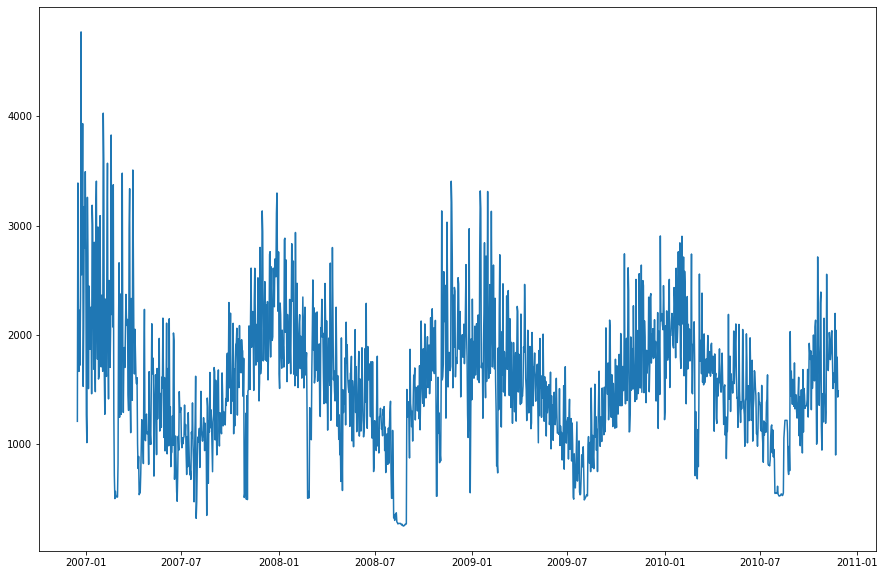

In [58]:
plt.figure(figsize=(15,10))
plt.plot(daily_data['Global_active_power'])

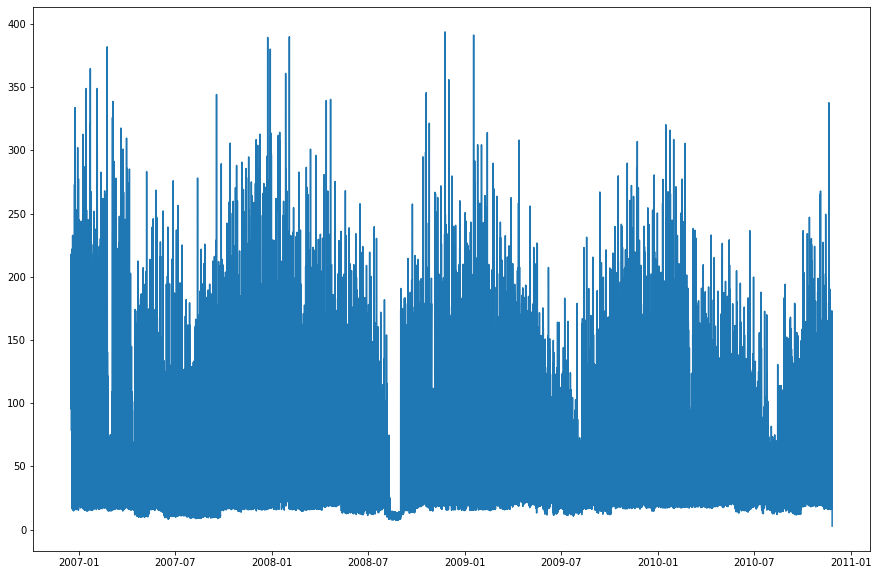

In [59]:
plt.figure(figsize=(15,10))
plt.plot(hourly_data['Global_active_power'])

In [60]:
daily_data['power']=daily_data['Global_active_power']

In [61]:
daily_data=daily_data.drop(['Global_active_power', 'Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3','Sub_metering_4'],axis=1)

In [62]:
daily_data.head()

,power
datetime,
2006-12-16,1209.176
2006-12-17,3390.460
2006-12-18,2203.826
2006-12-19,1666.194
2006-12-20,2225.748


In [63]:
daily_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1442 entries, 2006-12-16 to 2010-11-26
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   power   1442 non-null   float64
dtypes: float64(1)
memory usage: 22.5 KB


In [64]:
daily_data_mod=daily_data[:100]

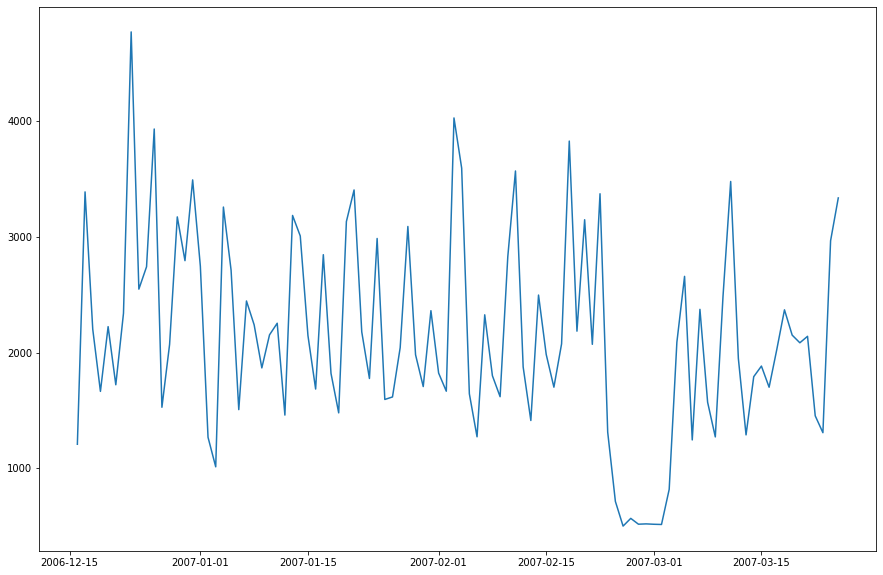

In [65]:
plt.figure(figsize=(15,10))
plt.plot(daily_data_mod['power'])

In [66]:
hourly_data['power']=hourly_data['Global_active_power']

In [67]:
hourly_data=hourly_data.drop(['Global_active_power', 'Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3','Sub_metering_4'],axis=1)

In [68]:
hourly_data.head()

,power
datetime,
2006-12-16 17:00:00,152.024
2006-12-16 18:00:00,217.932
2006-12-16 19:00:00,204.014
2006-12-16 20:00:00,196.114
2006-12-16 21:00:00,183.388


In [69]:
hourly_data_mod=hourly_data[:240]

In [70]:
hourly_data_mod

,power
datetime,
2006-12-16 17:00:00,152.024
2006-12-16 18:00:00,217.932
2006-12-16 19:00:00,204.014
2006-12-16 20:00:00,196.114
2006-12-16 21:00:00,183.388
...,...
2006-12-26 12:00:00,147.882
2006-12-26 13:00:00,173.208
2006-12-26 14:00:00,229.596


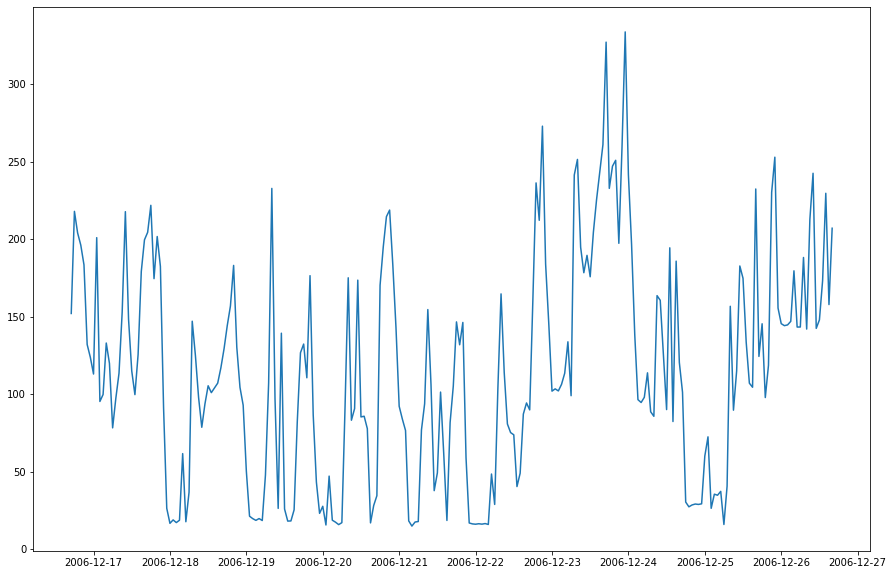

In [71]:
plt.figure(figsize=(15,10))
plt.plot(hourly_data_mod['power'])

**stationarity test**

In [95]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(daily_data['power'])

In [73]:
#H1: It is stationary

def adfuller_test(consumption):
    result=adfuller(consumption)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [96]:
adfuller_test(daily_data['power'])


ADF Test Statistic : -3.6973846561548145
p-value : 0.004150092044557602
#Lags Used : 22
Number of Observations Used : 1419
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
#daily_data['power First Difference'] = daily_data['power'] - daily_data['power'].shift(1)


In [75]:
import warnings
warnings.filterwarnings('ignore')

**arima**

In [97]:
stepwise_fit=auto_arima(daily_data['power'].dropna(),trace=True,supress_warnings=True)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=21610.186, Time=0.87 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=22166.468, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=21998.515, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=21668.713, Time=0.78 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=22164.469, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=21611.243, Time=1.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=21615.344, Time=1.47 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=21597.438, Time=2.76 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=21595.519, Time=2.30 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=21688.814, Time=0.31 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=21593.987, Time=3.00 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=21685.454, Time=0.40 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=21588.689, Time=1.26 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=21612.151, Time=0.47 sec
 ARIMA(5,1,2)(0,0,0

In [98]:
stepwise_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1442
Model:               SARIMAX(3, 1, 3)   Log Likelihood              -10736.968
Date:                Fri, 30 Apr 2021   AIC                          21487.937
Time:                        20:42:52   BIC                          21524.848
Sample:                             0   HQIC                         21501.715
                               - 1442                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1575      0.026     -6.012      0.000      -0.209      -0.106
ar.L2         -0.8660      0.012    -70.758      0.000      -0.890      -0.842
ar.L3          0.2827      0.025     11.411      0.000       0.234       0.331
ma.L1         -0.4604      0.018    -25.930      0.000      -0.495      -0.426
ma.L2          0.5845      0.014     42.433      0.000       0.557       0.611
ma.L3         -0.8364      0.017    -49.829      0.000      -0.869      -0.804
sigma2      1.744e+05   4406.983     39.580      0.000    1.66e+05    1.83e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               546.73
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                             0.52
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [99]:
from statsmodels.tsa.arima_model import ARIMA


In [100]:
1442*.7


1009.4

In [102]:
train=daily_data.iloc[:1009]
test=daily_data.iloc[1009:]
print(train.shape,test.shape)

(1009, 1) (433, 1)


In [103]:
model=ARIMA(train['power'].dropna(),order=(3,1,3))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.power   No. Observations:                 1008
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -7576.452
Method:                       css-mle   S.D. of innovations            444.103
Date:                Fri, 30 Apr 2021   AIC                          15168.904
Time:                        20:43:48   BIC                          15208.230
Sample:                    12-17-2006   HQIC                         15183.845
                         - 09-19-2009                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.8143      2.293     -0.355      0.722      -5.308       3.679
ar.L1.D.power    -0.1307      0.044     -2.953      0.003      -0.218      -0.044
ar.L2.D.power    -0.8533      0.020    -42.328      0.000      -0.893      -0.814
ar.L3.D.power     0.3104      0.042      7.335      0.000       0.227       0.393
ma.L1.D.power    -0.4647      0.029    -15.803      0.000      -0.522      -0.407
ma.L2.D.power     0.5773      0.018     32.380      0.000       0.542       0.612
ma.L3.D.power    -0.8404      0.024    -35.430      0.000      -0.887      -0.794
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.2236           -0.9788j            1.0040           -0.2857
AR.2           -0.2236           +0.9788j            1.0040            0.2857
AR.3            3.1962           -0.0000j            3.1962           -0.0000
MA.1           -0.2214           -1.0021j            1.0263           -0.2846
MA.2           -0.2214           +1.0021j            1.0263            0.2846
MA.3            1.1298           -0.0000j            1.1298           -0.0000
-----------------------------------------------------------------------------
"""

In [108]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
print(pred)

2009-09-20    1662.144162
2009-09-21    1408.915132
2009-09-22    1560.992548
2009-09-23    1608.830814
2009-09-24    1392.849321
                 ...     
2010-11-22    1122.415317
2010-11-23    1157.067108
2010-11-24    1164.315661
2010-11-25    1124.739685
2010-11-26    1133.121372
Freq: D, Length: 433, dtype: float64


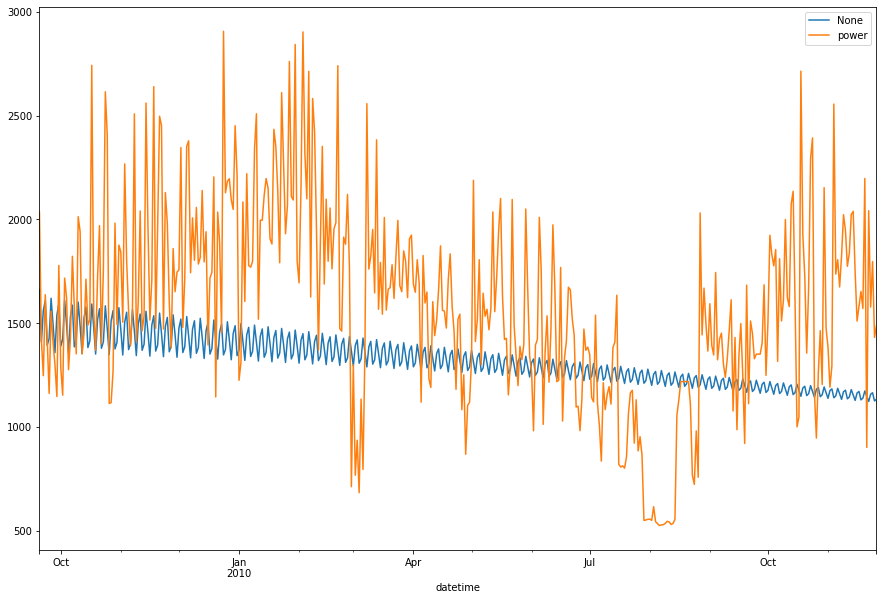

In [110]:
plt.figure(figsize=(15,10))

pred.plot(legend=True)
test['power'].plot(legend=True)

In [131]:
start=len(train)
end=len(train)+7
predsmall=model.predict(start=start,end=end,typ='levels')
print(predsmall)

2009-09-20    1662.144162
2009-09-21    1408.915132
2009-09-22    1560.992548
2009-09-23    1608.830814
2009-09-24    1392.849321
2009-09-25    1426.107062
2009-09-26    1619.536763
2009-09-27    1497.468868
Freq: D, dtype: float64


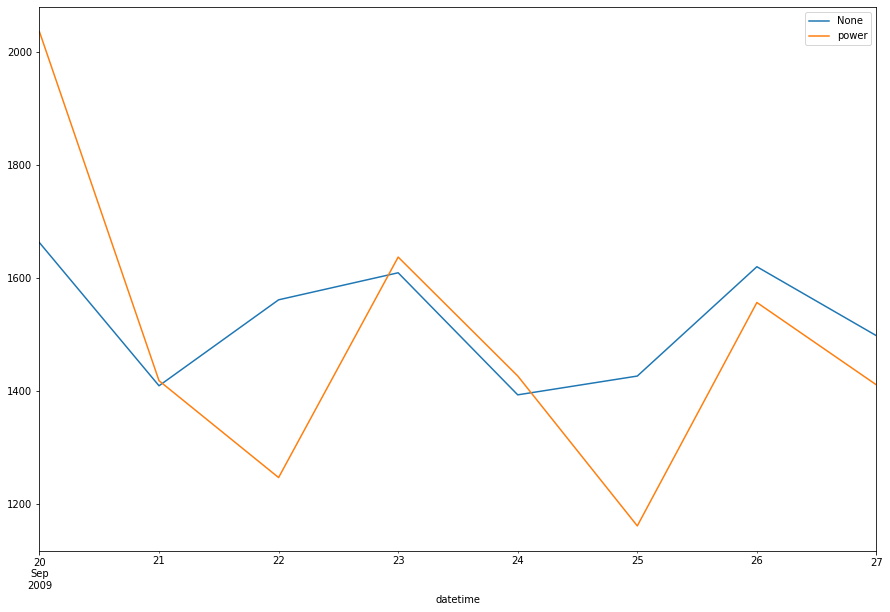

In [134]:
plt.figure(figsize=(15,10))

predsmall.plot(legend=True)
test['power'][:8].plot(legend=True)

In [116]:
test['power'].mean()


1584.54060969977

In [117]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['power']))
print(rmse)

515.3827155038997


In [135]:
test['power'][:8].mean()


1486.2927499999998

In [136]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(predsmall,test['power'][:8]))
print(rmse)

200.61265807556492


In [137]:
model2=ARIMA(daily_data['power'],order=(3,1,3))
model2=model2.fit()
daily_data.tail()

,power
datetime,
2010-11-22,2041.536
2010-11-23,1577.536
2010-11-24,1796.248
2010-11-25,1431.164
2010-11-26,1488.104


In [140]:
index_future_dates=pd.date_range(start='2010-11-27',end='2010-12-4')
forcast=model2.predict(start=len(daily_data),end=len(daily_data)+7,typ='levels').rename('arima preds')
forcast.index=index_future_dates
print(forcast)

2010-11-27    1607.830379
2010-11-28    1638.601068
2010-11-29    1629.853989
2010-11-30    1637.376428
2010-12-01    1651.584034
2010-12-02    1639.531721
2010-12-03    1630.441480
2010-12-04    1645.514829
Freq: D, Name: arima preds, dtype: float64


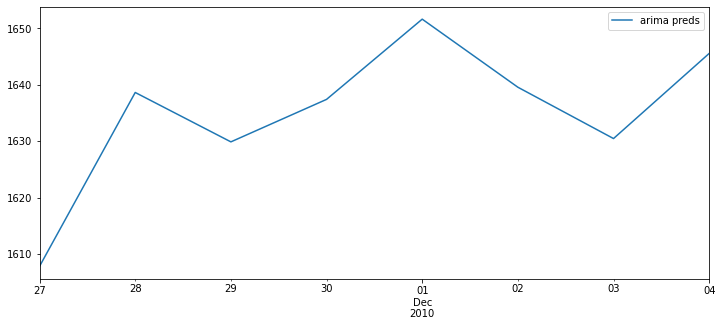

In [141]:
forcast.plot(figsize=(12,5),legend=True)
